In [26]:
# Simple CNN model for CIFAR-10
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.constraints import maxnorm
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_data_format('channels_first')
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Hvae to run the code on TF GPU otherwise code makes stupid breaks

In [27]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num TPUs Available: ", len(tf.config.experimental.list_physical_devices('TPU')))

Num GPUs Available:  1
Num TPUs Available:  0


In [28]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [29]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [31]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [32]:
print(num_classes)

10


Old model

In [33]:
#TASK 1
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:], kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)              

In [34]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [35]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6754 - accuracy: 0.3933 - val_loss: 1.3550 - val_accuracy: 0.5175
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3074 - accuracy: 0.5304 - val_loss: 1.1671 - val_accuracy: 0.5875
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1469 - accuracy: 0.5884 - val_loss: 1.0695 - val_accuracy: 0.6203
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0202 - accuracy: 0.6378 - val_loss: 1.0191 - val_accuracy: 0.6396
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9214 - accuracy: 0.6741 - val_loss: 0.9651 - val_accuracy: 0.6589
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8418 - accuracy: 0.7013 - val_loss: 0.9388 - val_accuracy: 0.6693
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7701 - accuracy: 0.7289 - val_loss: 0.9492 - val_accuracy:

In [36]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 70.55%


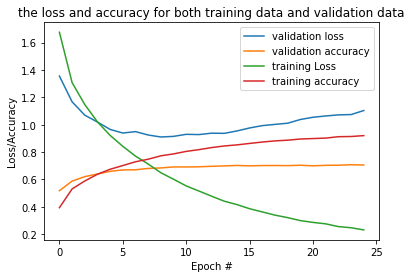

In [37]:
plt.figure()
plt.plot(np.arange(0, 25), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 25), history.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 25), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 25), history.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [38]:
model.save('./savedModel' + '.h5')

In [39]:
model2 = tf.keras.models.load_model('savedModel.h5')

In [40]:
for img in range(0,4):
  predict_class = model2.predict_classes(X_test[[img],:])
  print("predicted class for image:" + str(img) +" is: " + str(predict_class))

predicted class for image:0 is: [3]
predicted class for image:1 is: [8]
predicted class for image:2 is: [0]
predicted class for image:3 is: [0]


In [41]:
for img in range(0,4):
  print(y_test[img])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


New model: Adjusting the code to resemble the changes that were asked to be made in the ICP instructions

In [42]:
# Create the new model according to the ICP instructions
modelnew = models.Sequential()
modelnew.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:], kernel_constraint=maxnorm(3)))
modelnew.add(layers.Dropout(0.2))
modelnew.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
modelnew.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelnew.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
modelnew.add(layers.Dropout(0.2))
modelnew.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
modelnew.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelnew.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
modelnew.add(layers.Dropout(0.2))
modelnew.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
modelnew.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelnew.add(layers.Flatten())
modelnew.add(layers.Dropout(0.2))
modelnew.add(layers.Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
modelnew.add(layers.Dropout(0.2))
modelnew.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
modelnew.add(layers.Dropout(0.2))
modelnew.add(layers.Dense(num_classes, activation='softmax'))
modelnew.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 16, 16)       

In [43]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
modelnew.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [44]:
# Fit the model
historynew = modelnew.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8702 - accuracy: 0.3082 - val_loss: 1.5044 - val_accuracy: 0.4439
Epoch 2/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4297 - accuracy: 0.4791 - val_loss: 1.3227 - val_accuracy: 0.5113
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2207 - accuracy: 0.5603 - val_loss: 1.1264 - val_accuracy: 0.5980
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0622 - accuracy: 0.6202 - val_loss: 0.9820 - val_accuracy: 0.6500
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9446 - accuracy: 0.6644 - val_loss: 0.8797 - val_accuracy: 0.6857
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8534 - accuracy: 0.7001 - val_loss: 0.8318 - val_accuracy: 0.7075
Epoch 7/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7963 - accuracy: 0.7152 - val_loss: 0.7709 - val_ac

In [45]:
# Final evaluation of the model
scores = modelnew.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.12%


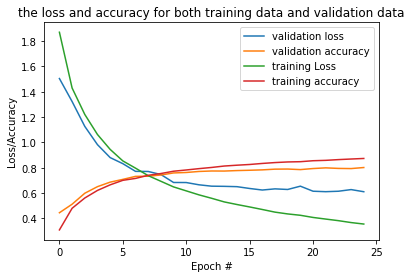

In [46]:
plt.figure()
plt.plot(np.arange(0, 25), historynew.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 25), historynew.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 25), historynew.history["loss"], label="training Loss")
plt.plot(np.arange(0, 25), historynew.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [47]:
modelnew.save('./savedModel' + '.h5')

In [48]:
modelnew2 = tf.keras.models.load_model('savedModel.h5')

In [49]:
for img in range(0,4):
  predict_class = modelnew2.predict_classes(X_test[[img],:])
  print("predicted class for image:" + str(img) +" is: " + str(predict_class))

predicted class for image:0 is: [3]
predicted class for image:1 is: [8]
predicted class for image:2 is: [8]
predicted class for image:3 is: [0]


In [50]:
for img in range(0,4):
  print(y_test[img])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
